In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [3]:
datanew = data.loc[data['Name_calc'] == 'Cholesterol in LDL (LDLc)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'BP_res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  Lipids_Res
544850     2015-04-21       235.0
544851     2015-02-13        66.0
544852     2017-10-19        64.0
544853     2016-10-14       136.0
544854     2014-03-18       293.0
...               ...         ...
1431292    2018-10-16        29.0
1431293    2018-06-05       247.0
1431294    2019-07-17       222.0
1431295    2019-11-01         3.0
1431296           NaN       326.0

[886447 rows x 2 columns]


In [4]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew

In [5]:
filt_df = indexedDataset.loc[:, indexedDataset.columns != 'PerformedDate']
low = .25
high = .75

quant_df = filt_df.quantile([low, high])
print(quant_df)
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
filt_df = pd.concat([indexedDataset.loc[:,'PerformedDate'], filt_df], axis=1)
filt_df.dropna(inplace=True)
print(filt_df)

      Lipids_Res
0.25       125.0
0.75       273.0
        PerformedDate  Lipids_Res
544850     2015-04-21       235.0
544853     2016-10-14       136.0
544857     2017-12-04       171.0
544865     2007-04-09       262.0
544868     2013-04-20       232.0
...               ...         ...
1431288    2019-11-15       224.0
1431289    2018-12-10       265.0
1431290    2019-11-15       171.0
1431293    2018-06-05       247.0
1431294    2019-07-17       222.0

[408851 rows x 2 columns]


In [6]:
indexedDataset = filt_df.set_index(['PerformedDate'])

In [7]:
from datetime import datetime

In [8]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               Lipids_Res
PerformedDate            
2015-04-21          235.0
2016-10-14          136.0
2017-12-04          171.0
2007-04-09          262.0
2013-04-20          232.0
...                   ...
2019-11-15          224.0
2018-12-10          265.0
2019-11-15          171.0
2018-06-05          247.0
2019-07-17          222.0

[408851 rows x 1 columns]


In [9]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Lipids_Res
PerformedDate            
1995-09-05          249.0
1995-10-05          224.0
1995-11-08          183.0
1995-11-30          206.0
1995-12-28          237.0
...                   ...
2019-12-31          241.0
2019-12-31          138.0
2019-12-31          242.0
2019-12-31          166.0
2019-12-31          242.0

[408851 rows x 1 columns]


               Lipids_Res
PerformedDate            
2018-03-01          199.0
2018-03-01          213.0
2018-03-01          198.0
2018-03-01          138.0
2018-03-01          174.0
...                   ...
2018-04-30          147.0
2018-04-30          147.0
2018-04-30          139.0
2018-04-30          147.0
2018-04-30          167.0

[7194 rows x 1 columns]


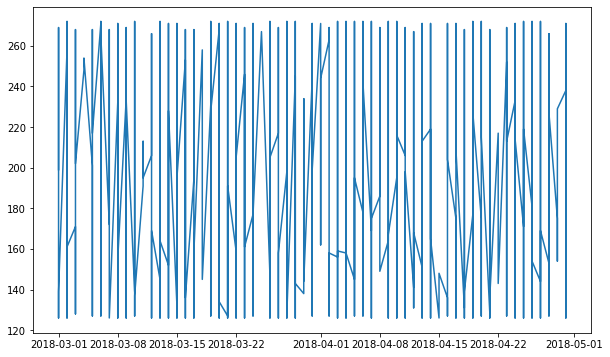

In [12]:
sub = indexedDataset['2018-03':'2018-04']
print(sub)
plt.plot(sub)

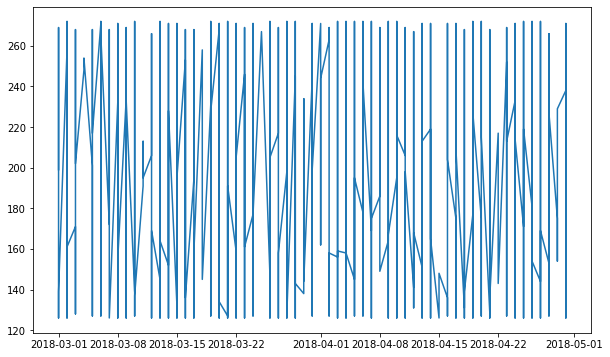

In [13]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Lipids_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [14]:
indexedDataset = new2
print(indexedDataset)

               Lipids_Res
PerformedDate            
2018-03-01          199.0
2018-03-01          213.0
2018-03-01          198.0
2018-03-01          138.0
2018-03-01          174.0
...                   ...
2018-04-30          147.0
2018-04-30          147.0
2018-04-30          139.0
2018-04-30          147.0
2018-04-30          167.0

[7194 rows x 1 columns]


In [15]:
print(indexedDataset.max())
print(indexedDataset.min())

Lipids_Res    272.0
dtype: float64
Lipids_Res    126.0
dtype: float64


In [16]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30     186.250000
2018-04-30     185.583333
2018-04-30     180.666667
2018-04-30     175.750000
2018-04-30     178.333333

[7194 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30      39.813486
2018-04-30      40.446279
2018-04-30      42.341326
2018-04-30      42.557181
2018-04-30      40.830767

[7194 rows x 1 columns]


In [17]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Lipids_Res
PerformedDate            
2018-03-01       5.293305
2018-03-01       5.361292
2018-03-01       5.288267
2018-03-01       4.927254
2018-03-01       5.159055
...                   ...
2018-04-30       4.990433
2018-04-30       4.990433
2018-04-30       4.934474
2018-04-30       4.990433
2018-04-30       5.117994

[7194 rows x 1 columns]


In [18]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30       5.206003
2018-04-30       5.201586
2018-04-30       5.172104
2018-04-30       5.143983
2018-04-30       5.161095

[7194 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30       0.215047
2018-04-30       0.219193
2018-04-30       0.230001
2018-04-30       0.229853
2018-04-30       0.218425

[7194 rows x 1 columns]


In [19]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Lipids_Res
PerformedDate,
2018-03-01,0.062366
2018-03-01,0.229980
2018-03-01,0.012352
2018-03-01,-0.241705
2018-03-01,0.247870
2018-03-01,-0.021679
2018-03-01,-0.208917
2018-03-01,-0.023351
2018-03-01,-0.161738


In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Lipids_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

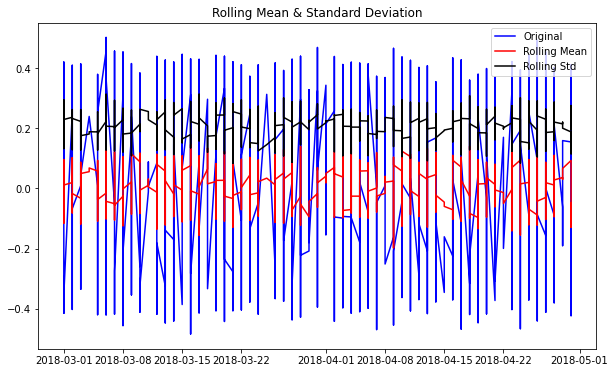

Results of Dickey-Fuller Test:
Test Statistic                  -22.705377
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7147.000000
Critical Value (1%)              -3.431265
Critical Value (5%)              -2.861944
Critical Value (10%)             -2.566985
dtype: float64


In [21]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

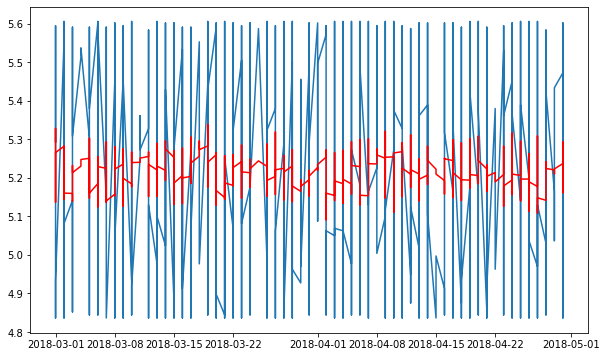

In [22]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

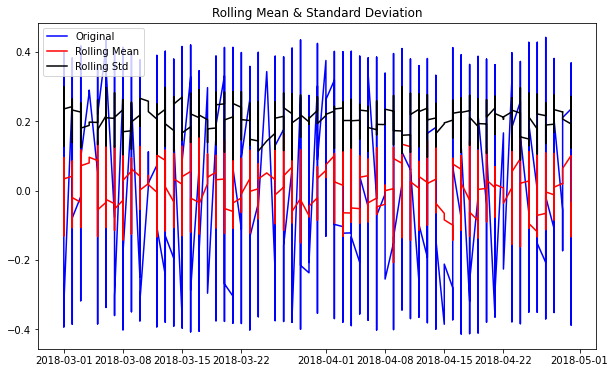

Results of Dickey-Fuller Test:
Test Statistic                  -19.990626
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    7161.000000
Critical Value (1%)              -3.431264
Critical Value (5%)              -2.861944
Critical Value (10%)             -2.566985
dtype: float64


In [23]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

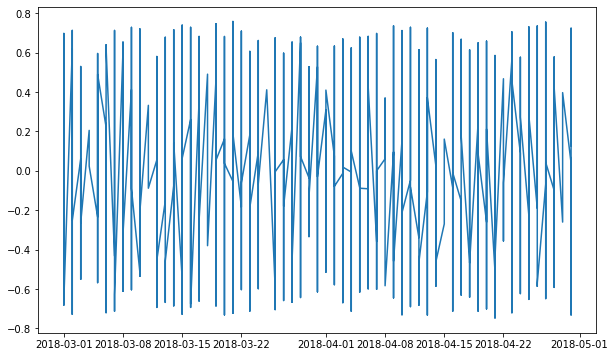

In [24]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

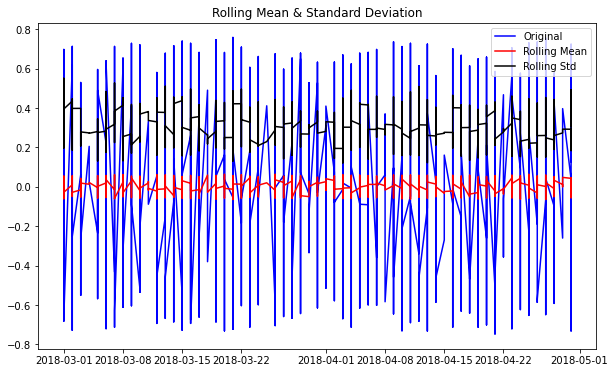

Results of Dickey-Fuller Test:
Test Statistic                  -24.798958
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    7158.000000
Critical Value (1%)              -3.431264
Critical Value (5%)              -2.861944
Critical Value (10%)             -2.566985
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-40-f0c1f802b178>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-40-f0c1f802b178>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


               Lipids_Res
PerformedDate            
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
...                   ...
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0

[7194 rows x 1 columns]


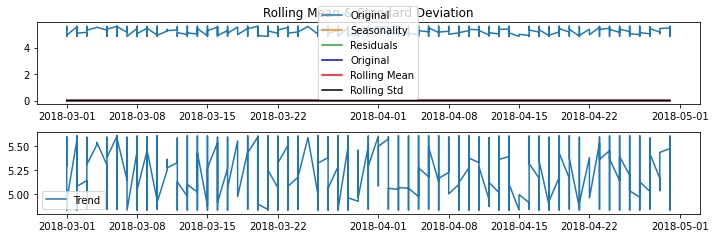

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    7193.000000
Critical Value (1%)              -3.431259
Critical Value (5%)              -2.861942
Critical Value (10%)             -2.566984
dtype: float64


c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [40]:
import statsmodels as sm
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

decomposition = seasonal_decompose(indexedDataset_logScale, period = 1 ) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
s = pd.DataFrame(decomposedLogData)
df = s.rename(columns={"resid": "Lipids_Res"})
print(df)
test_stationarity(df)

In [26]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


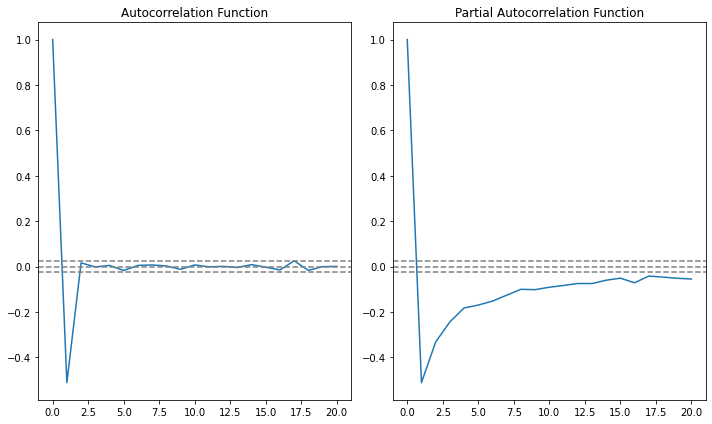

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


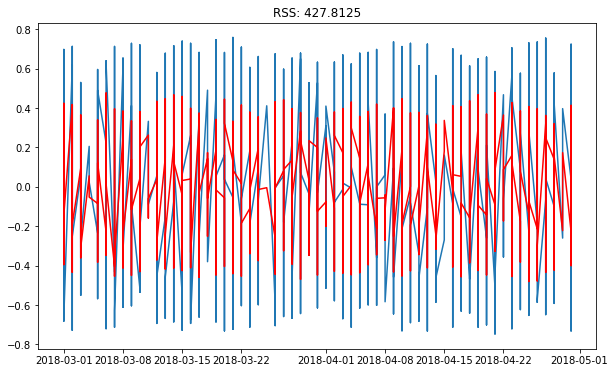

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


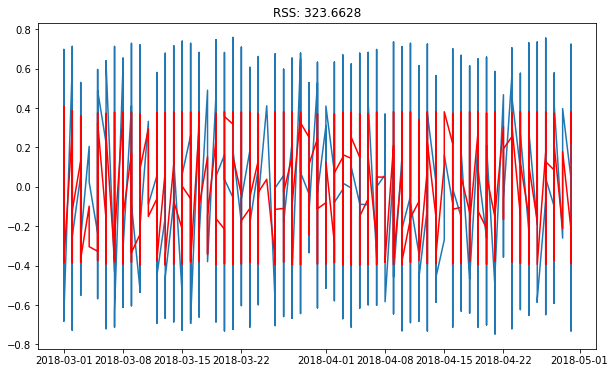

In [29]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning

Text(0.5, 1.0, 'RSS: 323.6329')

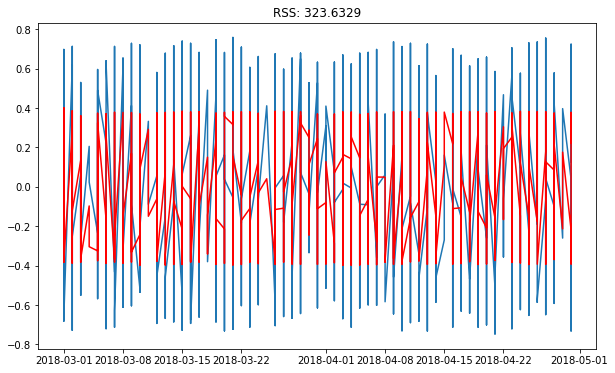

In [30]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))

In [31]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-03-01    6.312044e-08
2018-03-01   -3.421101e-02
2018-03-01    2.628733e-02
2018-03-01    2.924880e-01
2018-03-01    4.704032e-02
dtype: float64


In [32]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-03-01    6.312044e-08
2018-03-01   -3.421095e-02
2018-03-01   -7.923616e-03
2018-03-01    2.845644e-01
2018-03-01    3.316047e-01
dtype: float64


In [33]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-03-01    5.293305
2018-03-01    5.259094
2018-03-01    5.285381
2018-03-01    5.577869
2018-03-01    5.624910
dtype: float64

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)

PerformedDate
2018-03-01    199.000013
2018-03-01    192.307158
2018-03-01    197.429431
2018-03-01    264.507397
2018-03-01    277.247205
                 ...    
2018-04-30    180.315504
2018-04-30    225.936435
2018-04-30    283.096181
2018-04-30    375.252668
2018-04-30    470.155966
Length: 1112654, dtype: float64


In [36]:
j = (predictions_ARIMA-indexedDataset['Lipids_Res'])**2
#print(j)
k = len(indexedDataset['Lipids_Res'])
#print(k)
u = sum(j/k)
#print(u)
rmse = np.sqrt(u)

In [37]:
print(rmse)

291047833.4834353


Text(0.5, 1.0, 'RMSE: 291047833.4834')

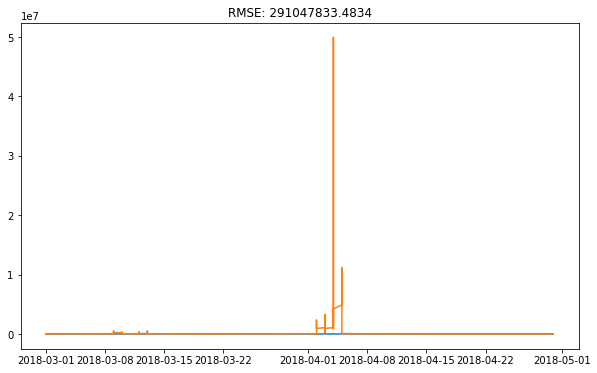

In [39]:
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% rmse)